<a href="https://colab.research.google.com/github/islamfahmy/Eigen-Faces/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle



     |████████████████████████████████| 61kB 4.0MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=99c6275199cd77e28b682f9fbe90df5972de97f5ed9ceeec4bef15b63067c9a5
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
from google.colab import files
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sollytarek","key":"08f4657aeea44416a20dcf562a0ec5f7"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              227KB  2021-04-30 20:52:11           3943        385  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           2282        225  0.9375           
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            501         24  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

In [ ]:
 ! kaggle datasets download kasikrit/att-database-of-faces

  0% 0.00/3.61M [00:00<?, ?B/s]
100% 3.61M/3.61M [00:00<00:00, 230MB/s]


In [ ]:
! mkdir ORL
! unzip att-database-of-faces.zip -d ORL


Archive:  att-database-of-faces.zip
  inflating: ORL/README              
  inflating: ORL/s1/1.pgm            
  inflating: ORL/s1/10.pgm           
  inflating: ORL/s1/2.pgm            
  inflating: ORL/s1/3.pgm            
  inflating: ORL/s1/4.pgm            
  inflating: ORL/s1/5.pgm            
  inflating: ORL/s1/6.pgm            
  inflating: ORL/s1/7.pgm            
  inflating: ORL/s1/8.pgm            
  inflating: ORL/s1/9.pgm            
  inflating: ORL/s10/1.pgm           
  inflating: ORL/s10/10.pgm          
  inflating: ORL/s10/2.pgm           
  inflating: ORL/s10/3.pgm           
  inflating: ORL/s10/4.pgm           
  inflating: ORL/s10/5.pgm           
  inflating: ORL/s10/6.pgm           
  inflating: ORL/s10/7.pgm           
  inflating: ORL/s10/8.pgm           
  inflating: ORL/s10/9.pgm           
  inflating: ORL/s11/1.pgm           
  inflating: ORL/s11/10.pgm          
  inflating: ORL/s11/2.pgm           
  inflating: ORL/s11/3.pgm           
  inflating: O

In [ ]:
import os
from skimage.io import imread
import numpy as np
os.chdir('/content/ORL')
directory = os.getcwd()
files=os.listdir(directory)

files.remove('README')
files = sorted(files, key=lambda x: int(x[1:]))
Dataset=[]
y=[]

Y=0

for filename in files:
    Y+=1
    each_file=os.listdir(filename)
    each_file.sort()
    each_file = sorted(each_file, key=lambda x: int(x[:-4]))
    for image in each_file:
      img = imread(os.getcwd()+'/'+filename+'/'+image)
      Dataset.append(img.flatten())
      y.append(Y)

labels=np.array(y)
data=np.array(Dataset)



In [ ]:
train = data[::2,:]
train_labels =labels[::2]
test_labels = labels[1::2]
test =data[1::2,:]
print(train.shape)
print(test.shape)

(200, 10304)
(200, 10304)


Performin PCA


In [ ]:
mean = np.mean(train,axis=0)
print(mean.shape)

(10304,)


In [ ]:
z= train - mean
cov = np.cov(z.T)
print(z.shape)
cov.dtype

(200, 10304)


dtype('float64')

In [ ]:
eigVal,eigVec=np.linalg.eigh(cov.T)

In [ ]:
idx = eigVal.argsort()[::-1]
eval = eigVal[idx]
evec = eigVec[:,idx]


In [ ]:
eval = np.array(eval)
evec= np.array(evec)
r=eval/np.sum((eval))
alpha =[0.8,0.85,0.9,0.95,0.99]
index= 0 
sum = 0
no =0;
ans=[]
for i in r :
  if index>=len(alpha) :
    break
  sum+=i 
  while  index<len(alpha) and sum >=alpha[index]:
    index+=1
    ans.append(no)
  no+=1
print(ans)


[35, 50, 75, 114, 172]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = [1]
for i in ans :
  projected_train1=np.dot(train,evec[:,0:i])
  projected_test1=np.dot(test,evec[:,0:i])
  neigh = KNeighborsClassifier(n_neighbors=1,weights = 'distance')
  neigh.fit(projected_train1,train_labels)
  print(neigh.score(projected_test1,test_labels))

  

0.95
0.95
0.94
0.94
0.94


Performing LDA


In [ ]:
#lda
import math

cls=np.zeros((40,5,10304))
mu = np.zeros(40)
for i in range(0,200,5):
  cls[math.floor(i/5)]=train[i:i+5]
  #print(cls.shape)
  mu=np.mean(cls,axis=1)
print(mu)
print(mu.shape)
print("\n")
mu=mu[:, np.newaxis]
print(mu.shape)
print("\n")
mean_all=np.mean(train,axis=0)
print(mean_all)
print(mean_all.shape)
sb=np.zeros((10304,10304))
for i in range(40):
  sb+=5*np.dot((mu[i]-mean_all).T,(mu[i]-mean_all))
print(sb)


z=np.zeros((40,10304,5))
#s=np.zeros((40,10304,10304))

print(cls[i].shape)
ss=np.zeros((10304,10304))
print(z[i].shape)
for i in range(40):
  z[i]=cls[i].T-mu[i].T
  s_i=np.dot(z[i],z[i].T)
  ss=ss+s_i 
s_inv=np.linalg.inv(ss) 
print(s_inv) 
eign_vals, eign_vecs = np.linalg.eigh(np.dot(s_inv,sb))

idx = eign_vals.argsort()[::-1] 
eign_vals = eign_vals[idx]
eign_vecs =eign_vecs[:,idx] 

mat = eign_vecs[:,:39]
print(mat)

[[ 46.8  51.4  53.8 ...  37.6  37.8  38.6]
 [ 36.2  35.8  36.  ...  97.4  99.8  97.2]
 [103.6 107.  104.4 ...  47.2  49.6  47. ]
 ...
 [106.2 109.2 107.4 ...  70.   63.4  61.8]
 [ 84.6  87.2  83.8 ... 127.  123.4 122.8]
 [125.2 123.6 125.4 ...  78.4  82.   77.8]]
(40, 10304)


(40, 1, 10304)


[86.115 86.265 86.685 ... 76.5   77.395 77.085]
(10304,)
[[221513.555 220621.705 218488.645 ... -16726.5   -21288.885 -10780.955]
 [220621.705 220582.155 218178.495 ... -18392.1   -22588.335 -11850.305]
 [218488.645 218178.495 216305.155 ... -18975.3   -23655.315 -13299.645]
 ...
 [-16726.5   -18392.1   -18975.3   ... 298757.2   305832.7   291714.1  ]
 [-21288.885 -22588.335 -23655.315 ... 305832.7   318949.395 305942.485]
 [-10780.955 -11850.305 -13299.645 ... 291714.1   305942.485 300057.155]]
(5, 10304)
(10304, 5)
[[ 3.73751691e+09  4.63390724e+09  6.99593809e+09 ... -2.51773894e+09
   1.27491478e+09  1.12333102e+10]
 [-8.69178826e+08  6.18135389e+09 -1.05238552e+11 ... -2.18244786e+10
  -2.50

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_PCA = []
accuracy_LDA = []
projected_train=np.dot(train,mat)
projected_test=np.dot(test,mat)
neighbors = [1,3,5,7]
for i in neighbors :
  neigh_LDA = KNeighborsClassifier(n_neighbors=i,weights = 'distance')
  neigh_PCA = KNeighborsClassifier(n_neighbors=i,weights = 'distance')
  neigh_LDA.fit(projected_train,train_labels)
  neigh_PCA.fit(projected_train1,train_labels)
  accuracy_LDA.append(neigh_LDA.score(projected_test,test_labels))
  print(accuracy_LDA[-1])
  accuracy_PCA.append(neigh_PCA.score(projected_test1,test_labels))
   

0.945
0.9
0.9
0.89


Diffrence betwee LDA and PCA 


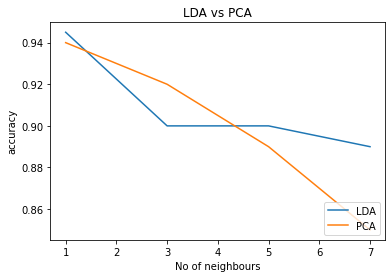

In [ ]:
import matplotlib.pyplot as plt


line_chart1 = plt.plot(neighbors, accuracy_LDA)
line_chart2 = plt.plot(neighbors, accuracy_PCA)
plt.title('LDA vs PCA')
plt.xlabel('No of neighbours')
plt.ylabel('accuracy')
plt.legend(['LDA', 'PCA'], loc=4)
plt.show()


In [ ]:
! mkdir /content/NonFaces
! unzip /content/Dataset2-20210430T202501Z-001.zip -d /content/NonFaces


Archive:  /content/Dataset2-20210430T202501Z-001.zip
  inflating: /content/NonFaces/Dataset2/1/21106.jpg  
  inflating: /content/NonFaces/Dataset2/17/20225.jpg  
  inflating: /content/NonFaces/Dataset2/1/20978.jpg  
  inflating: /content/NonFaces/Dataset2/1/21091.jpg  
  inflating: /content/NonFaces/Dataset2/1/20986.jpg  
  inflating: /content/NonFaces/Dataset2/1/21001.jpg  
  inflating: /content/NonFaces/Dataset2/1/20983.jpg  
  inflating: /content/NonFaces/Dataset2/10/20556.jpg  
  inflating: /content/NonFaces/Dataset2/1/20980.jpg  
  inflating: /content/NonFaces/Dataset2/1/21052.jpg  
  inflating: /content/NonFaces/Dataset2/1/21046.jpg  
  inflating: /content/NonFaces/Dataset2/1/30000.jpg  
  inflating: /content/NonFaces/Dataset2/1/20996.jpg  
  inflating: /content/NonFaces/Dataset2/1/21097.jpg  
  inflating: /content/NonFaces/Dataset2/10/20558.jpg  
  inflating: /content/NonFaces/Dataset2/1/21125.jpg  
  inflating: /content/NonFaces/Dataset2/10/20559.jpg  
  inflating: /content/Non

In [ ]:
import os
from skimage.io import imread
import numpy as np
os.chdir('/content/NonFaces/Dataset2')
directory = os.getcwd()
files=os.listdir(directory)

Dataset=[]


for filename in files:
    each_file=os.listdir(filename)
    for image in each_file:
      img = imread(os.getcwd()+'/'+filename+'/'+image)
      Dataset.append(img.flatten())
     
data=np.array(Dataset)

function That returns whole set of faces with a number of Non-faces data



In [ ]:
def cut(x) :
  temp = data[0:x,:]
  train_non = temp[::2,:]
  test_non =temp[1::2,:]
  z = np.zeros((train_non.shape[0],1))
  train_non=np.append(train_non, z, axis=1)
  z = np.zeros((test_non.shape[0],1))
  test_non=np.append(test_non, z, axis=1)
  temp =np.append(train,np.ones((train.shape[0],1)),axis=1)
  train_non=np.append(train_non,temp,axis=0)
  temp = np.append(test,np.ones((test.shape[0],1)),axis=1)
  test_non=np.append(test_non,temp,axis=0)
  print(test_non.shape)
  return train_non ,test_non

Performing LDA on faces Vs non Faces classes and picking dominant vectors 


In [ ]:
samples = [10,50,100,250,400]
for sample in samples : 
  print("no of samples : ",sample)
  train1,test1=cut(sample)
  mean = np.mean(train1)
  D  =np.array(np.split(train1, np.unique(train1[:, -1], return_index=True)[1][1:]),dtype=object)
  means = []
  for i in D :
    means.append(np.mean(i[:,0:-1],axis=0))
  means = np.array(means)
  sub = np.subtract(means[0] , means[1])
  sub = sub.reshape(1,10304)
  b = np.dot(sub.T, sub)
  z= []
  for Di,Ui in zip(D,means) :
    temp = Di[:,0:-1]-Ui
    z.append(temp)
  z= np.array(z)
  s = np.zeros((10304,10304))
  for i in range(len(z)):
    s += D[i].shape[0]*np.dot(z[i].T, z[i])
  eigen_values_, eigen_vectors_ = np.linalg.eigh(np.dot(np.linalg.inv(s), b))  
  eigVal =np.abs((eigen_values_))
  eigVec=eigen_vectors_
  idx_ = np.argsort(eigVal)[::-1]
  eigVal = eigVal[idx_]
  eigVec = eigVec[:,idx_]
  eig_sum = np.sum(eigVal)
  sumi = eigVal[0];
  oldsum=0;
  i=1;
  while (sumi-oldsum)/eig_sum>0.01 :
    i+=1
    oldsum=sumi
    sumi+=eigVal[i]
  print(i)
  dominant = eigVec[:i,:]  
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import accuracy_score

 
  neighbors=np.array([1,3,5,7])
  accuracy=[]
  projected_train=np.dot(train1[:,0:-1],dominant.T)
  projected_test=np.dot(test1[:,0:-1],dominant.T)
  for neighbor_num in neighbors: 
    neigh = KNeighborsClassifier(n_neighbors=neighbor_num)
    neigh.fit(projected_train,train1[:,-1])
    accuracy.append(neigh.score(projected_test,test1[:,-1]))
  print('Accuracy', accuracy)
   


no of samples :  10
(200, 10304)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


10
Accuracy [0.975609756097561, 0.975609756097561, 0.975609756097561, 0.975609756097561]
no of samples :  50
(200, 10304)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


10
Accuracy [0.9244444444444444, 0.9244444444444444, 0.9111111111111111, 0.9022222222222223]
no of samples :  100
(200, 10304)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


10
Accuracy [0.916, 0.904, 0.888, 0.876]
no of samples :  250
(200, 10304)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


10
Accuracy [0.8676923076923077, 0.8646153846153846, 0.8584615384615385, 0.8461538461538461]
no of samples :  400
(200, 10304)
